<a href="https://colab.research.google.com/github/kalpadas599/VOIS_AICTE_Oct2025_MajorProject_KalpaDas/blob/main/Netflix_Data_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Netflix Content Trends Analysis

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [83]:
df=pd.read_csv('Netflix Dataset.csv')

## Data Preprocessing

In [84]:
#Display columns
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [85]:
#check shape
df.shape

(7789, 11)

In [86]:
#View column names
print("\nColumn names")
print(df.columns.tolist())


Column names
['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country', 'Release_Date', 'Rating', 'Duration', 'Type', 'Description']


In [87]:
#understand information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


In [88]:
#check datatypes before cleaning
print("Datatypes before cleaning")
print(df.dtypes)

Datatypes before cleaning
Show_Id         object
Category        object
Title           object
Director        object
Cast            object
Country         object
Release_Date    object
Rating          object
Duration        object
Type            object
Description     object
dtype: object


Data Cleaning

In [89]:
#remove duplicates colmn
df.drop_duplicates(inplace=True)

In [90]:
#row and column counts
print(df.shape)

(7787, 11)


In [91]:
# Styles to use
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

In [92]:
#convert object datatype to neumeric datatypes
def convert_to_numeric(df, column_name):
    df[column_name] = pd.to_numeric(df[column_name], errors='coerce')

In [93]:
# Check for missing values
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64


In [131]:
# Convert 'Release_Date' to datetime
df["Release_Date"] = pd.to_datetime(df["Release_Date"], errors="coerce")

In [95]:
# Extract release year for trend analysis
df["Release_Year"] = df["Release_Date"].dt.year

In [133]:
# Fill missing categorical values with 'Unknown'
df["Country"] = df["Country"].fillna("Unknown")
df["Director"] = df["Director"].fillna("Unknown")
df["Cast"] = df["Cast"].fillna("Unknown")
df['Rating'].fillna('Unknown', inplace=True)

In [127]:
# Clean whitespace from strings
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [138]:
# Verify changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7787 entries, 0 to 7788
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Show_Id       7787 non-null   object        
 1   Category      7787 non-null   object        
 2   Title         7787 non-null   object        
 3   Director      7787 non-null   object        
 4   Cast          7787 non-null   object        
 5   Country       7787 non-null   object        
 6   Release_Date  7787 non-null   datetime64[ns]
 7   Rating        7787 non-null   object        
 8   Duration      7787 non-null   object        
 9   Type          7787 non-null   object        
 10  Description   7787 non-null   object        
 11  Release_Year  7787 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(10)
memory usage: 790.9+ KB


In [135]:
# Calculate median release year (ignoring missing values)
median_year = int(df["Release_Year"].median())

# Fill missing years with median
df["Release_Year"].fillna(median_year, inplace=True)

In [136]:
# Fill missing Release_Date using the imputed year
df["Release_Date"] = df.apply(
    lambda x: pd.Timestamp(year=int(x["Release_Year"]), month=1, day=1)
    if pd.isnull(x["Release_Date"]) else x["Release_Date"], axis=1
)

In [137]:
print(df.isnull().sum())

Show_Id         0
Category        0
Title           0
Director        0
Cast            0
Country         0
Release_Date    0
Rating          0
Duration        0
Type            0
Description     0
Release_Year    0
dtype: int64


### EDA

Category distribution

1.   Moview
2.   TV Show



In [140]:
# category distribution
category_distribution = df['Category'].value_counts()
movies_count = category_distribution['Movie']
tv_shows_count = category_distribution['TV Show']

In [141]:
print(f"Movies: {movies_count} ({movies_count/len(df)*100:.1f}%)")
print(f"TV Shows: {tv_shows_count} ({tv_shows_count/len(df)*100:.1f}%)")

Movies: 5377 (69.1%)
TV Shows: 2410 (30.9%)


In [142]:
category_by_year = df.groupby(['Release_Year', 'Category']).size().unstack(fill_value=0)

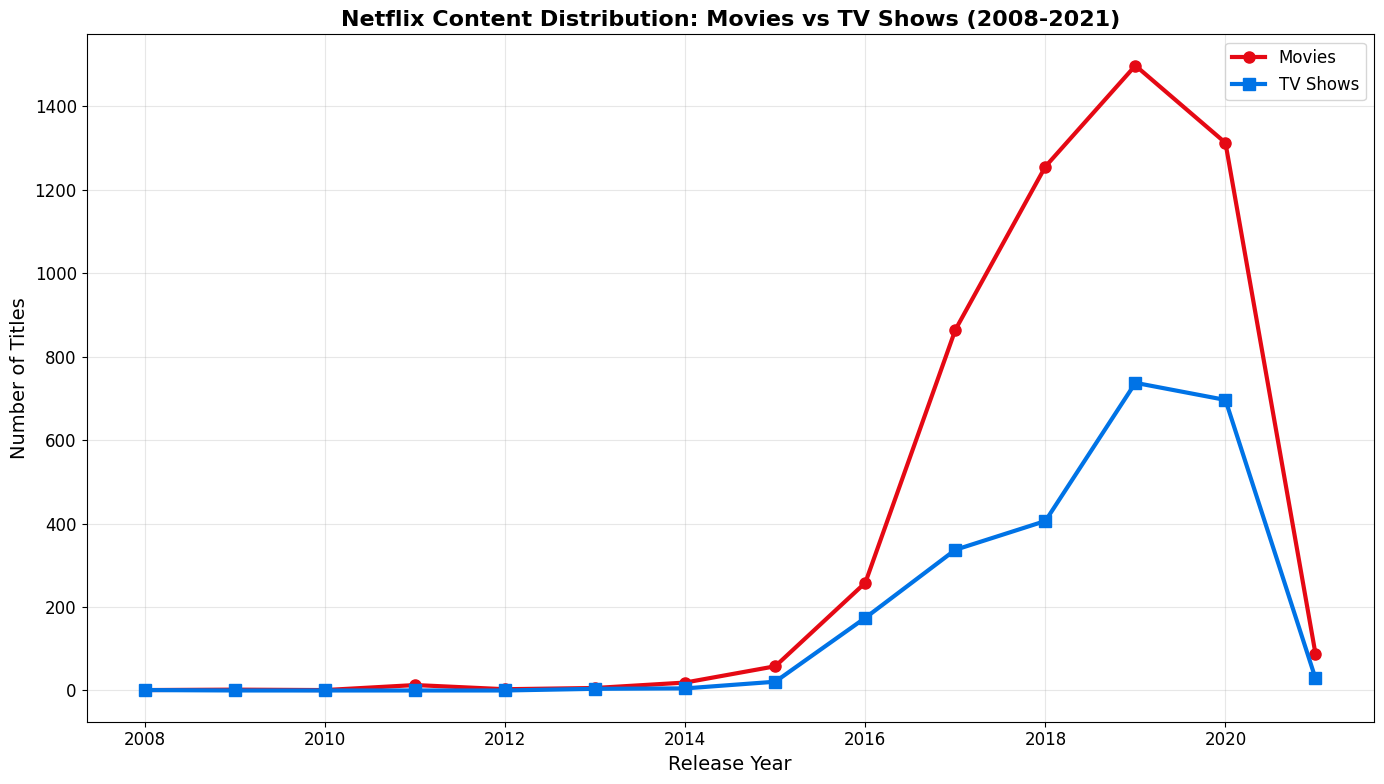

In [143]:
plt.figure(figsize=(14, 8))
plt.plot(category_by_year.index, category_by_year['Movie'], marker='o', linewidth=3, markersize=8, color='#E50914', label='Movies')
plt.plot(category_by_year.index, category_by_year['TV Show'], marker='s', linewidth=3, markersize=8, color='#0073E6', label='TV Shows')
plt.title('Netflix Content Distribution: Movies vs TV Shows (2008-2021)', fontsize=16, fontweight='bold')
plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Number of Titles', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('movies_vs_tvshows_chart.png', dpi=300, bbox_inches='tight')
plt.show()

In [144]:
# Basic statistics
print("\nDescriptive Statistics:")
print(df.describe(include='all').T)


Descriptive Statistics:
               count unique  \
Show_Id         7787   7787   
Category        7787      2   
Title           7787   7786   
Director        7787   4051   
Cast            7787   6832   
Country         7787    682   
Release_Date    7787    NaN   
Rating          7787     15   
Duration        7787    216   
Type            7787    492   
Description     7787   7769   
Release_Year  7787.0    NaN   

                                                            top  freq  \
Show_Id                                                   s7787     1   
Category                                                  Movie  5377   
Title                                              Consequences     2   
Director                                                Unknown  2388   
Cast                                                    Unknown   718   
Country                                           United States  2555   
Release_Date                                                

In [145]:
# Number of unique movies vs TV shows
print("\nCount by Category:\n", df["Category"].value_counts())


Count by Category:
 Category
Movie      5377
TV Show    2410
Name: count, dtype: int64


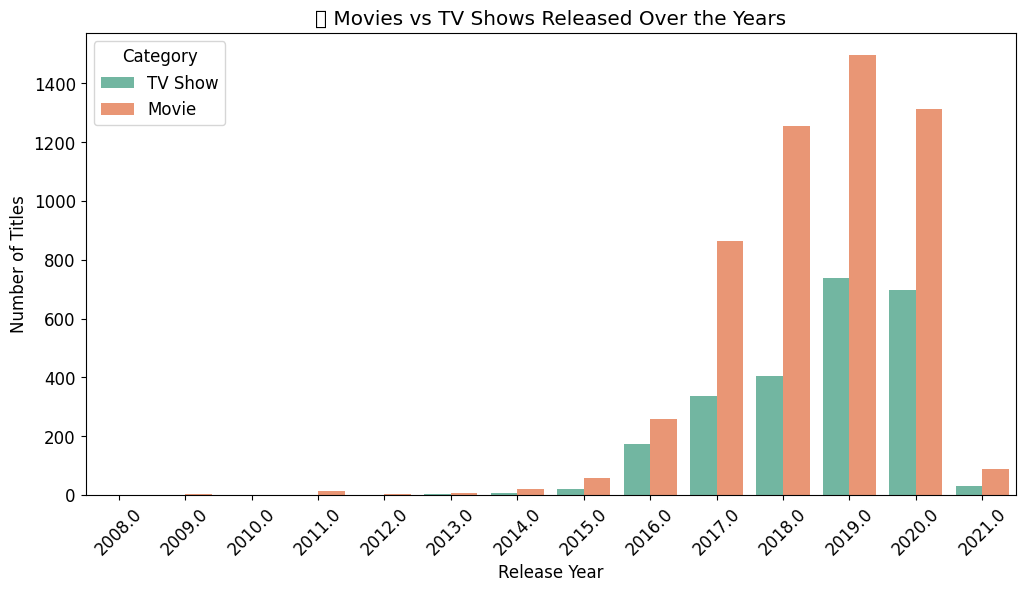

In [146]:
# Distribution of release years
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="Release_Year", hue="Category", palette="Set2")
plt.title("📈 Movies vs TV Shows Released Over the Years")
plt.xticks(rotation=45)
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.show()

## Visualization: Genres Analysis

In [147]:
# Split multi-genre entries (comma-separated)
genre_data = df["Type"].dropna().str.split(", ").explode().value_counts().reset_index()
genre_data.columns = ["Genre", "Count"]

In [148]:
print("\nTop 15 Genres:")
for i, (genre, count) in enumerate(top_15_genres.items(), 1):
    print(f"{i:2d}. {genre}: {count}")


Top 15 Genres:
 1. International Movies: 2437
 2. Dramas: 2106
 3. Comedies: 1471
 4. International TV Shows: 1199
 5. Documentaries: 786
 6. Action & Adventure: 721
 7. TV Dramas: 704
 8. Independent Movies: 673
 9. Children & Family Movies: 532
10. Romantic Movies: 531
11. TV Comedies: 525
12. Thrillers: 491
13. Crime TV Shows: 427
14. Kids' TV: 414
15. Docuseries: 353


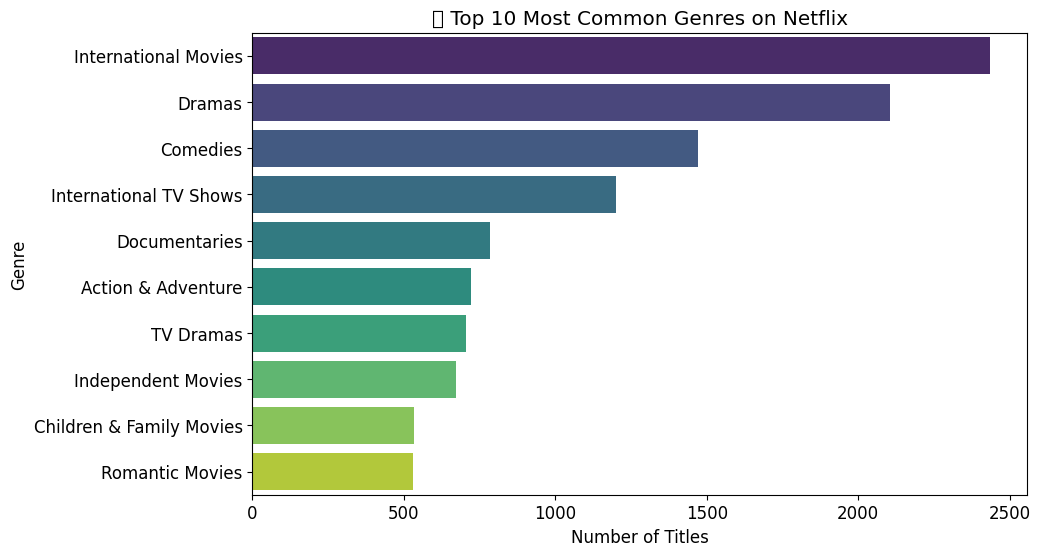

In [149]:
# Top 10 genres
plt.figure(figsize=(10,6))
sns.barplot(data=genre_data.head(10), x="Count", y="Genre", palette="viridis")
plt.title("🎬 Top 10 Most Common Genres on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.show()

### Visualization: Country-Wise Contribution

In [150]:
# Top 10 countries contributing to Netflix content
country_counts = df["Country"].value_counts().head(10).reset_index()
country_counts.columns = ["Country", "Count"]

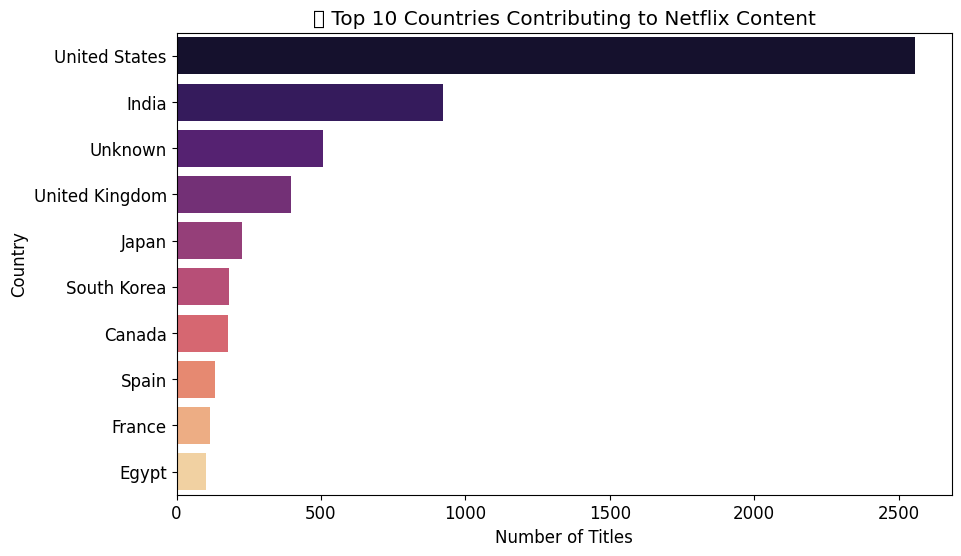

In [151]:
plt.figure(figsize=(10,6))
sns.barplot(data=country_counts, x="Count", y="Country", palette="magma")
plt.title("🌍 Top 10 Countries Contributing to Netflix Content")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()

In [154]:
# column Country
df['Country'].value_counts()

,count
Country,
United States,2555
India,923
Unknown,507
United Kingdom,397
Japan,226
...,...
"Peru, United States, United Kingdom",1
"Saudi Arabia, United Arab Emirates",1
"United Kingdom, France, United States, Belgium",1


In [155]:
all_countries = []
for countries in df['Country'].dropna():
    country_list = [country.strip() for country in countries.split(',')]
    all_countries.extend(country_list)

In [156]:
print("\nAll Countries:")
for i, (country, count) in enumerate(country_counts.items(), 1):
    print(f"{i:2d}. {country}: {count}")


All Countries:
 1. Country: 0     United States
1             India
2           Unknown
3    United Kingdom
4             Japan
5       South Korea
6            Canada
7             Spain
8            France
9             Egypt
Name: Country, dtype: object
 2. Count: 0    2555
1     923
2     507
3     397
4     226
5     183
6     177
7     134
8     115
9     101
Name: Count, dtype: int64


Netflix content rating distribution


Top 5 Ratings:
1. TV-MA: 2863 (36.8%)
2. TV-14: 1931 (24.8%)
3. TV-PG: 806 (10.4%)
4. R: 665 (8.5%)
5. PG-13: 386 (5.0%)


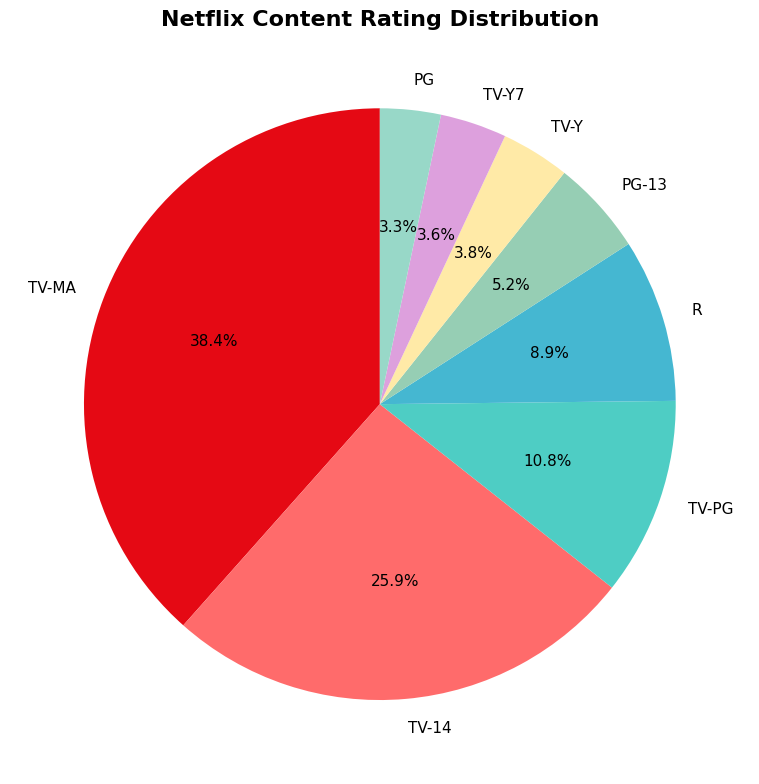

In [157]:
rating_dist = df['Rating'].value_counts()
print("\nTop 5 Ratings:")
for i, (rating, count) in enumerate(rating_dist.head(5).items(), 1):
    print(f"{i}. {rating}: {count} ({count/len(df)*100:.1f}%)")

plt.figure(figsize=(10, 8))
top_ratings = rating_dist.head(8)
colors = ['#E50914', '#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD', '#98D8C8']
wedges, texts, autotexts = plt.pie(top_ratings.values, labels=top_ratings.index, autopct='%1.1f%%',
                                  colors=colors, startangle=90, textprops={'fontsize': 11})
plt.title('Netflix Content Rating Distribution', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('rating_distribution_chart.png', dpi=300, bbox_inches='tight')
plt.show()

Interactive Visualization

---



In [158]:
import plotly.express as px

# Interactive genre plot
fig = px.bar(genre_data.head(15), x="Count", y="Genre",
             title="🎥 Interactive View of Top 15 Genres",
             orientation='h', color="Count", color_continuous_scale='Viridis')
fig.show()

### Filtering Examples

In [159]:
# Example 1: Filter only movies from India
movies_india = df[(df["Category"]=="Movie") & (df["Country"].str.contains("India"))]
print("Number of Movies from India:", len(movies_india))

Number of Movies from India: 915


In [160]:
# Example 2: Filter TV Shows released after 2018
recent_tvshows = df[(df["Category"]=="TV Show") & (df["Release_Year"]>=2018)]
print("Number of TV Shows released after 2018:", len(recent_tvshows))

Number of TV Shows released after 2018: 1868


In [161]:
# Example 3: Filter specific genre (e.g., Dramas)
drama_titles = df[df["Type"].str.contains("Dramas", na=False)]
print("Number of Dramas:", len(drama_titles))

Number of Dramas: 2810


Count of titles over years.

In [162]:
# Count of titles per year
yearly_counts = df.groupby("Release_Year").size().reset_index(name="Count")

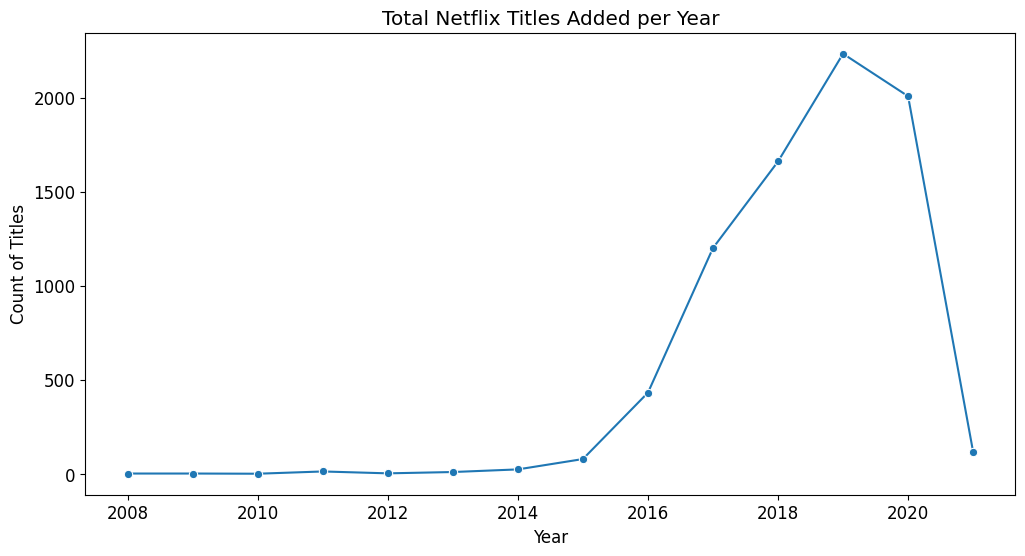

In [163]:
# Plot yearly trend
plt.figure(figsize=(12,6))
sns.lineplot(data=yearly_counts, x="Release_Year", y="Count", marker="o")
plt.title("Total Netflix Titles Added per Year")
plt.xlabel("Year")
plt.ylabel("Count of Titles")
plt.show()

Save Cleaned Dataset

In [164]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [165]:
df.to_csv("/content/drive/MyDrive/Netflix_Cleaned.csv", index=False)
print("Cleaned dataset saved to your Drive!")

Cleaned dataset saved to your Drive!
